In [1]:
import os
import sys

sys.path.append("/home/marsdenlab/projects/dl_template")
sys.path.append("/home/marsdenlab/projects/dl_template/scripts")
sys.path.append("/home/marsdenlab/projects/")

import json
import numpy as np
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
from xmlGroupsToJson import parse_xml 

import seg_regression.modules.io as io

plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":22})

In [2]:
SPACING = 0.035
DIMS    = 128
DIMS_VEC = [DIMS, DIMS]
ORIGIN  = [0, 0]
SPACING_VEC = [SPACING, SPACING]

top_dir = "/home/marsdenlab/projects/SV/user_variation"

out_dir = '../results/user_variation'

xml_dirs = {
    "OSMSC0171": [
        top_dir+'/0171_1/Segmentations',
        top_dir+'/0171_2/Segmentations',
        top_dir+'/0171_3/Segmentations'
    ],
    
    "cabg6":[
        top_dir+'/cabg6_1/Segmentations',
        top_dir+'/cabg6_2/Segmentations',
        top_dir+'/cabg6_3/Segmentations',
        top_dir+'/cabg6_4/Segmentations'
    ]
}

case_files = {
    "OSMSC0171":[],
    "cabg6":[]
}

In [3]:
for case in xml_dirs:
    od = out_dir+'/'+case
    try:
        os.mkdir(od)
    except:
        print(od, " already exists")
        
    dirs = xml_dirs[case]
    
    for i in range(len(dirs)):
        odd = od+'/'+str(i)
        try:
            os.mkdir(odd)
        except:
            print(odd, " already exists")
            
        d = dirs[i]
        
        segs = os.listdir(d)
        for s in segs:
            parse_xml(d+'/'+s, odd, "a")
            
        files = os.listdir(odd)
        files = [odd+'/'+f for f in files]
        
        case_files[case] += files

../results/user_variation/OSMSC0171  already exists
../results/user_variation/OSMSC0171/0  already exists
../results/user_variation/OSMSC0171/1  already exists
../results/user_variation/OSMSC0171/2  already exists
../results/user_variation/cabg6  already exists
../results/user_variation/cabg6/0  already exists
../results/user_variation/cabg6/1  already exists
../results/user_variation/cabg6/2  already exists
../results/user_variation/cabg6/3  already exists


In [4]:
NBOOT = 10
Np    = 20

r_means = []
r_stds  = []

NEW_SPACING = 0.035

for key,files in case_files.items():
    for file in files:
        fn = file.split('/')[-1]
        
        all_fn = [f for f in files if fn in f]
        
        radiuses = []
        
        for f in all_fn:
            jd = io.load_json(f)
            
            c = np.array(jd['contour2D'])
            inds = np.arange(c.shape[0])
            
            for i in range(NBOOT):
                    selected = np.random.choice(inds, size=Np)
                    
                    sel_pts  = c[inds]
                    
                    mu = np.mean(sel_pts,axis=0)
                    
                    sel_norm = sel_pts-mu
                    
                    sel_norm = sel_norm*NEW_SPACING/SPACING
                    
                    rs = np.sqrt(np.sum(sel_norm**2,axis=1))
                    
                    r = np.mean(rs)
                    
                    radiuses.append(r)
            
        r_means.append(np.mean(radiuses))
        r_stds.append(np.std(radiuses))
        
r_means = np.array(r_means)
r_stds   = np.array(r_stds)
r_stds_norm = r_stds/r_means

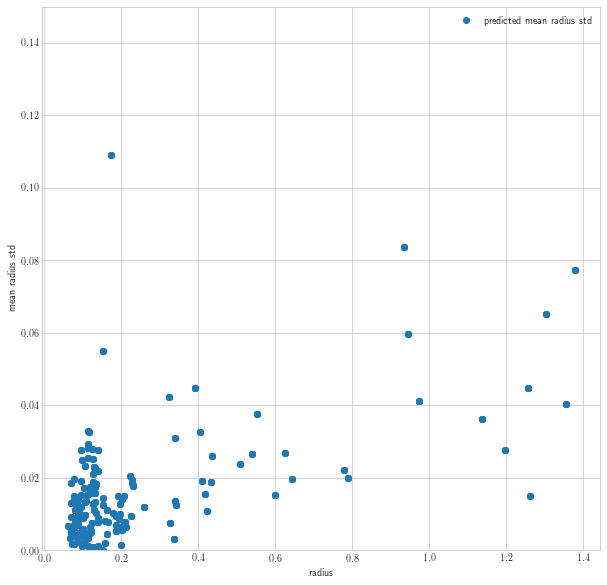

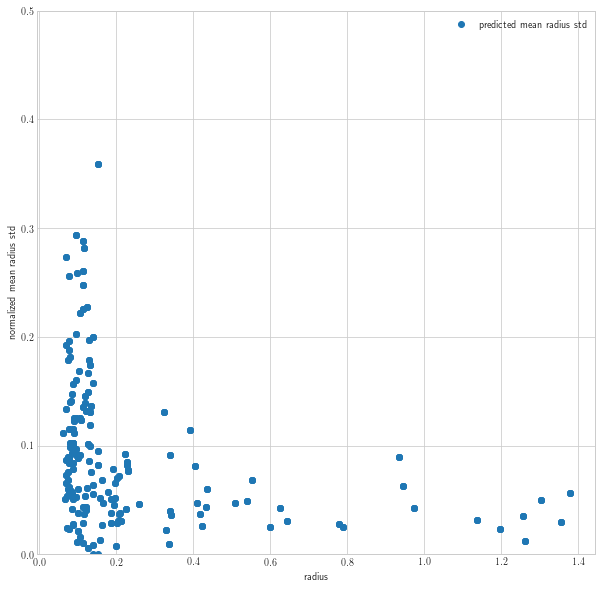

In [7]:
plt.figure(figsize=(10,10))
plt.plot(r_means, r_stds, marker='o', linestyle='', label='predicted mean radius std')
plt.legend()
plt.xlabel('radius')
plt.ylabel('mean radius std')
plt.ylim(0,0.15)
plt.savefig('radius_user_std.png', dpi=300)
plt.show()

plt.figure(figsize=(10,10))
plt.plot(r_means, r_stds_norm, marker='o', linestyle='', label='predicted mean radius std')
plt.legend()
plt.xlabel('radius')
plt.ylabel('normalized mean radius std')
plt.ylim(0,0.5)
plt.savefig('norm_radius_user_std.png', dpi=300)
plt.show()

In [6]:
print(c)

[[ 0.00028952  0.07906508]
 [ 0.01368509  0.07754783]
 [ 0.02723758  0.07421088]
 [ 0.03998939  0.06876612]
 [ 0.05098293  0.06092547]
 [ 0.0592606   0.05040083]
 [ 0.06406799  0.03716482]
 [ 0.06546335  0.02223289]
 [ 0.06370815  0.00688119]
 [ 0.05906382 -0.0076141 ]
 [ 0.0517918  -0.01997684]
 [ 0.04219904 -0.02919332]
 [ 0.03077443 -0.03529972]
 [ 0.01805233 -0.03859468]
 [ 0.00456715 -0.03937683]
 [-0.00914676 -0.03794481]
 [-0.02254243 -0.03455339]
 [-0.03502262 -0.02928185]
 [-0.04597753 -0.02216561]
 [-0.05479735 -0.0132401 ]
 [-0.06087228 -0.00254073]
 [-0.06376379  0.00975974]
 [-0.06371858  0.02293916]
 [-0.06115462  0.03613805]
 [-0.05648989  0.04849691]
 [-0.05014236  0.05915627]
 [-0.04246537  0.06743412]
 [-0.03355363  0.07335845]
 [-0.02343719  0.07713474]
 [-0.01214612  0.07896845]]
